In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.interpolate as sciint
from skimage import io
from ipywidgets import interact

(200, 400, 400)


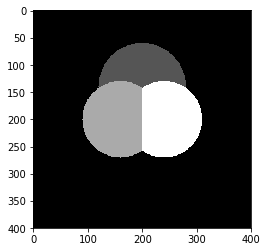

In [3]:
im = io.imread('../../../ForceInferenceProject/Data/Generated/three_intersecting_spheres_aniso.tif')
print(im.shape)
plt.figure()
plt.imshow(im[100],cmap='gray')
plt.show()

In [4]:
def aroundArray(image,zIndex,yIndex,xIndex):
    tempList = []
    for w in range(zIndex-1,zIndex+2):
        for q in range(yIndex-1,yIndex+2):
            for v in range(xIndex-1,xIndex+2):
                tempList.append(image[w][q][v])
    return tempList

def findTE(image,pointArray):
    tepoints = []
    teDict = {}
    for zIndex in range(len(im)):
        planePoints = []
        for x,y,z in pointArray:
            if z == zIndex:
                planePoints.append([x,y,zIndex])
        for point in planePoints:
            x,y = point[0], point[1]
            tempList = aroundArray(image,zIndex,y,x)
            if(len(set(tempList))==3):
                tup = tuple(set(tempList))
                if(tup in teDict):
                    teDict[tup][0].append(x)
                    teDict[tup][1].append(y)
                    teDict[tup][2].append(zIndex)
                else:
                    teDict[tup] = []
                    teDict[tup].append([x])
                    teDict[tup].append([y])
                    teDict[tup].append([zIndex])
                    
                listy = [x,y,zIndex]
                tepoints.append(listy)
    return tepoints,teDict

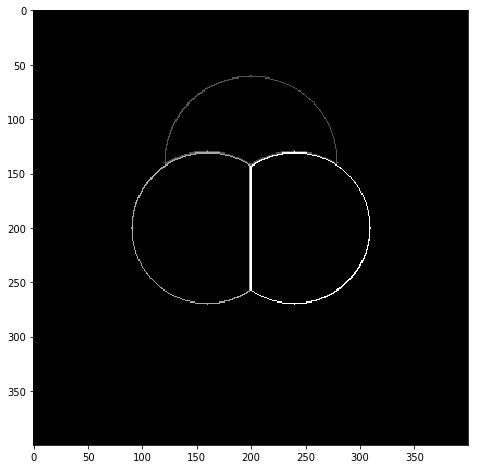

In [5]:
### Identify outlines by comparing shifted images

# Pad the image by 1 voxel on all sides
im_pad = np.pad(im, 1, mode='reflect')

# Get possible shifts in all directions
shifts = itertools.product([0,1], repeat=3)

# Check and accumulate differences in shifts
outlines = np.zeros_like(im, dtype=np.bool)
for shift in shifts:
    zs0, ys0, xs0 = [slice(1, None) if s else slice(None) for s in shift]
    zs1, ys1, xs1 = [slice(None,-1) if s else slice(None) for s in shift]
    comparison = im_pad[zs0, ys0, xs0] != im_pad[zs1, ys1, xs1]
    outlines  += comparison[:im.shape[0],  :im.shape[1],  :im.shape[2]]
    outlines  += comparison[-im.shape[0]:, -im.shape[1]:, -im.shape[2]:]  # Symmetry
    
# Re-annotate the cell identities
outlines_id = outlines * im

# print image
plt.figure(figsize=(8,8))
plt.imshow(outlines_id[100], cmap='gray')
plt.show()

#outline cordinates
sepOutlinePoints = np.where(outlines == True)  
outlinePoints = list(zip(sepOutlinePoints[2],sepOutlinePoints[1],sepOutlinePoints[0]))

In [6]:
TES, teDict = findTE(im,outlinePoints)
for x in teDict:
    print(x)

(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


In [7]:
TES_z = []
for TE in TES:
    if TE[2] == 100:
        TES_z.append(TE)
print(TES_z)

[[120, 141, 100], [121, 141, 100], [200, 141, 100], [279, 141, 100], [280, 141, 100], [120, 142, 100], [121, 142, 100], [199, 142, 100], [200, 142, 100], [279, 142, 100], [280, 142, 100], [199, 143, 100], [200, 143, 100], [199, 257, 100], [200, 257, 100], [199, 258, 100], [200, 258, 100], [200, 259, 100]]


In [8]:
@interact(z=(0, im.shape[0]-1, 1))
def show_stack(z=im.shape[0]//2):
    
    plt.figure(figsize=(8,8))
    plt.imshow(outlines_id[z], cmap='gray')
    
    TES_z_x = []
    TES_z_y = []
    for TE in TES:
        if TE[2] == z:
            TES_z_x.append(TE[0])
            TES_z_y.append(TE[1])
    
    plt.scatter(TES_z_x, TES_z_y, c='r', alpha=0.5, s=5)
    
    plt.show()

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
x = [TE[0] for TE in TES]
y = [TE[1] for TE in TES]
z = [TE[2] for TE in TES]

In [22]:
x

[162,
 163,
 164,
 165,
 235,
 236,
 237,
 238,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 177,
 178,
 179,
 180,
 181,
 182,
 218,
 219,
 220,
 221,
 222,
 223,
 178,
 179,
 180,
 181,
 182,
 218,
 219,
 220,
 221,
 222,
 180,
 181,
 182,
 183,
 217,
 218,
 219,
 220,
 181,
 182,
 183,
 184,
 216,
 217,
 218,
 219,
 182,
 183,
 184,
 185,
 215

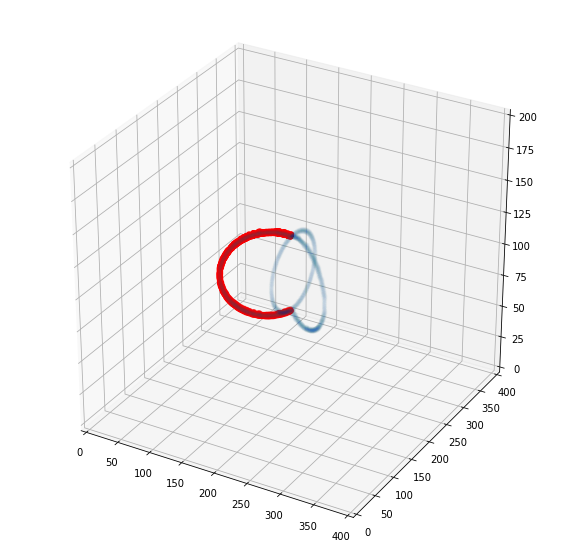

In [11]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, alpha = 0.01,linewidth = 0)
ax.scatter(teDict[(0, 1, 2)][0],teDict[(0, 1, 2)][1],teDict[(0, 1, 2)][2],c="r")
ax.set_xlim([0,400])
ax.set_ylim([0,400])
ax.set_zlim([0,200])
plt.show()

In [23]:
np.array([x,y,z]).shape

(3, 4824)

In [38]:
totalPoints = [x,y,z]
tck, fp, ier, msg = sciint.splprep(x = totalPoints, k = 1, full_output=1, quiet=0)
tck[0]
splev()
#tck2, t2 = sciint.splprep(x = totalPoints, k = 1)
print(tck[0])


[array([0.00000000e+00, 0.00000000e+00, 3.05274847e-05, ...,
       9.99715077e-01, 1.00000000e+00, 1.00000000e+00]), [array([161.99901817, 164.99676372, 237.45635207, ..., 215.67503159,
       186.08049943, 213.97044554]), array([171.00000655, 171.00002157, 170.99029141, ..., 186.00541594,
       186.99865876, 187.00049244]), array([ 67.,  67.,  67., ..., 133., 133., 133.])], 1]


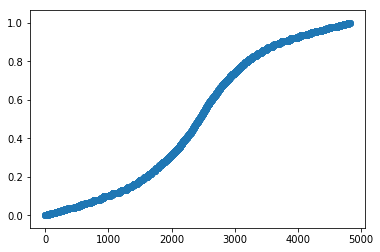

In [40]:
plt.scatter(np.arange(len(tck[1])),tck[1])

In [33]:
tck2

[array([0.00000000e+00, 0.00000000e+00, 3.05274847e-05, ...,
        9.99715077e-01, 1.00000000e+00, 1.00000000e+00]),
 [array([161.99901817, 164.99676372, 237.45635207, ..., 215.67503159,
         186.08049943, 213.97044554]),
  array([171.00000655, 171.00002157, 170.99029141, ..., 186.00541594,
         186.99865876, 187.00049244]),
  array([ 67.,  67.,  67., ..., 133., 133., 133.])],
 1]

In [29]:
tck

[array([0.00000000e+00, 0.00000000e+00, 3.05274847e-05, ...,
        9.99715077e-01, 1.00000000e+00, 1.00000000e+00]),
 [array([161.99901817, 164.99676372, 237.45635207, ..., 215.67503159,
         186.08049943, 213.97044554]),
  array([171.00000655, 171.00002157, 170.99029141, ..., 186.00541594,
         186.99865876, 187.00049244]),
  array([ 67.,  67.,  67., ..., 133., 133., 133.])],
 1]

IndexError: tuple index out of range

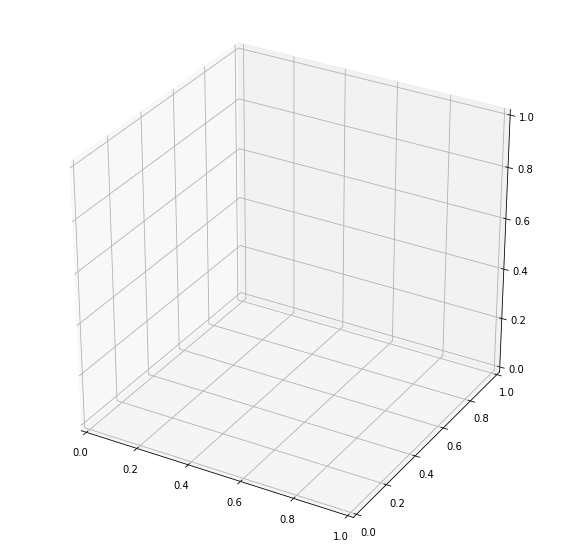

In [17]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111, projection='3d')

ax.plot(spl[0],spl[1],spl[2])

ax.set_xlim([0,400])
ax.set_ylim([0,400])
ax.set_zlim([0,200])
plt.show()